In [1]:
import pandas as pd
import numpy as np

In [26]:
import pandas as pd

data = pd.read_csv(r'C:\Users\archa\Desktop\TelecomChurn\telecom_churn_data.csv')


In [27]:
print(data.head())

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...     

In [33]:
data['avg_recharge'] = (data['arpu_6'] + data['arpu_7']) / 2
X = data['avg_recharge'].quantile(0.7)

In [34]:
high_value_customers = data[data['avg_recharge'] >= X]

In [35]:
print(f'Number of high-value customers: {len(high_value_customers)}')

Number of high-value customers: 30000


In [36]:
high_value_customers['churn'] = np.where(
    (high_value_customers['total_ic_mou_9'] == 0) & 
    (high_value_customers['total_og_mou_9'] == 0) & 
    (high_value_customers['vol_2g_mb_9'] == 0) & 
    (high_value_customers['vol_3g_mb_9'] == 0), 1, 0
)

C:\Users\archa\AppData\Local\Temp\ipykernel_14532\3821764677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_customers['churn'] = np.where(


In [37]:
high_value_customers = high_value_customers.drop(columns=[col for col in high_value_customers.columns if '_9' in col])

In [38]:
print(high_value_customers.head())

    mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
7            2014-06-30           2014-07-31            8/31/2014  1069.180   
8            2014-06-30           2014-07-31            8/31/2014   378.721   
13           2014-06-30           2014-07-31            8/31/2014   492.846   
16           2014-06-30           2014-07-31            8/31/2014   430.975   
17           2014-06-30           2014-07-31            8/31/2014   690.008   

      arpu_7  ...  fb_user_6  fb_user_7  fb_

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
X = high_value_customers.drop(columns=['churn'])
y = high_value_customers['churn']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)
X = pd.DataFrame(X)  # Convert to DataFrame for demonstration
y = pd.Series(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())


Original class distribution: 0    628
1     72
Name: count, dtype: int64
Resampled class distribution: 0    628
1    628
Name: count, dtype: int64


In [54]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       269
           1       0.77      0.77      0.77        31

    accuracy                           0.95       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.95      0.95      0.95       300

[[262   7]
 [  7  24]]


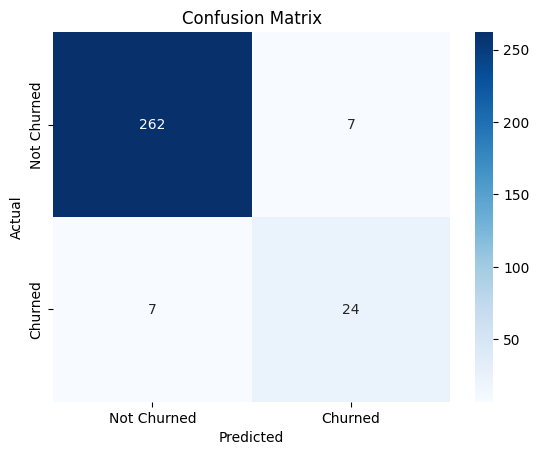

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [57]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

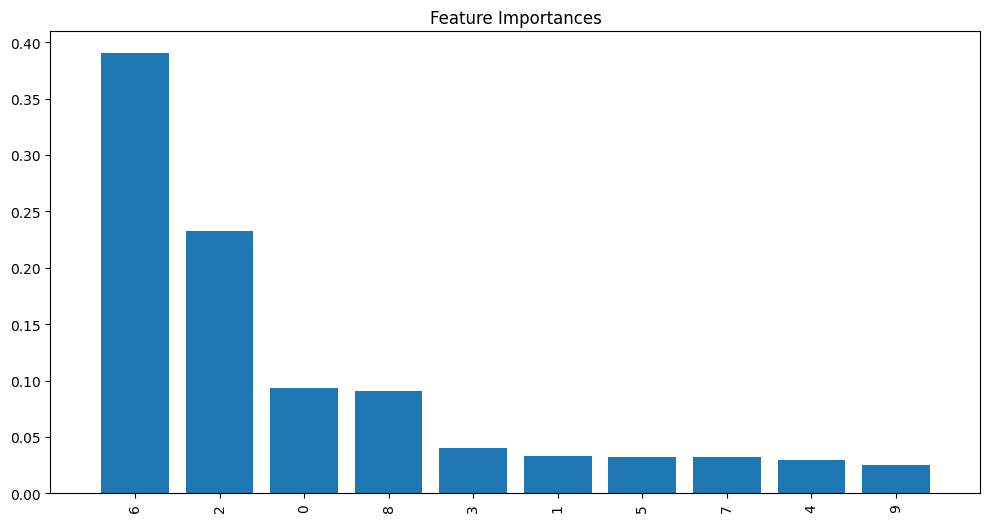

In [58]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [59]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [61]:
coefficients = log_model.coef_[0]
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
importance = importance.sort_values(by='Coefficient', ascending=False)
